In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
import itertools

## 【問題1】データの取得

In [2]:
data = sklearn.datasets.load_iris()

In [3]:
features = [
    'sepal_length',
    'sepal_width',
    'petal_length',
    'petal_width',
]

In [4]:
X = pd.DataFrame(data.data, columns=features)
X.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [5]:
y = pd.DataFrame(data.target, columns=["Species"])
y.head(10)

,Species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## 【問題2】データの結合

In [6]:
df = pd.concat([X, y], axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 【問題3】データの確認

### 先頭から4番目までのサンプルを表示

In [7]:
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


### ラベルごとのサンプル数

In [8]:
df["Species"].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

### 特徴量に欠損値があるかを確認する

In [10]:
df.isna().sum(axis=0) # 欠損値はない!

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

### 特徴量の平均値と標準偏差、四分位数を一度に表示させる

In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 【問題4】irisデータセット自体の調査

iris データセットはあやめの種類の予測を目的とする古典的なデータセットです。
説明変数は以下の４つです。

- がく片の長さ（cm）： Sepal Length
- がく片の幅（cm）： Sepal Width
- 花びらの長さ（cm）： Petal Length
- 花びらの幅（cm）： Petal Width

目的変数は3種類のあやめの種を表すカテゴリ変数で、

- setosa = 0
- versicolor = 1
- virginica = 2

のようにラベルと対応します。

このデータセットは 1936 に英国統計学者の Ronald Fisher によって導入されました。

サンプル数は 150 と少ないですが、理解しやすいため、練習、ベンチマーク目的でよく用いられます。

## 【問題5】必要なデータを抽出

### `sepal_width` の列を2つの異なる方法で抽出する

In [13]:
# 普通のインデックスを使う方法
df["sepal_width"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [16]:
# loc を使う方法
df.loc[:, "sepal_width"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

### 50番目から99番目までのデータを抽出する

In [17]:
df.iloc[59:100]

,sepal_length,sepal_width,petal_length,petal_width,Species
59,5.2,2.7,3.9,1.4,1
60,5.0,2.0,3.5,1.0,1
61,5.9,3.0,4.2,1.5,1
62,6.0,2.2,4.0,1.0,1
63,6.1,2.9,4.7,1.4,1
64,5.6,2.9,3.6,1.3,1
65,6.7,3.1,4.4,1.4,1
66,5.6,3.0,4.5,1.5,1
67,5.8,2.7,4.1,1.0,1
68,6.2,2.2,4.5,1.5,1


### `petal_length` の列の50番目から99番目までのデータを抽出する

In [19]:
df["petal_length"].iloc[50:100]

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal_length, dtype: float64

### `petal_width` の値が0.2のデータを抽出する

In [20]:
df.query("petal_width == 0.2")

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


## 【問題6】図の作成

### ラベルごとのサンプル数

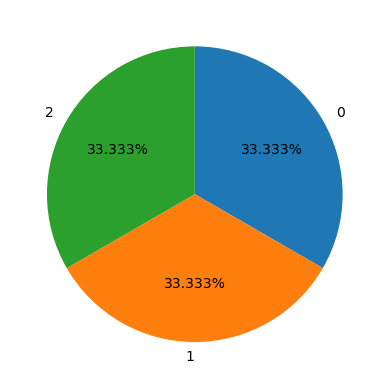

In [38]:
count_by_label = df["Species"].value_counts()
plt.pie(count_by_label, labels=count_by_label.index, autopct=lambda x: f"{x:.3f}%", counterclock=False, startangle=90)
plt.show()

### ラベルごとのデータの分布（箱ひげ図）

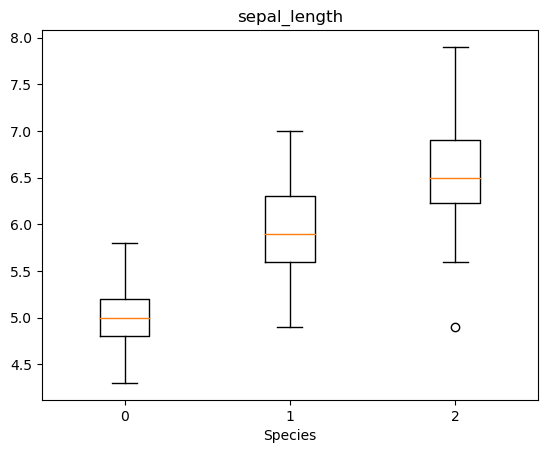

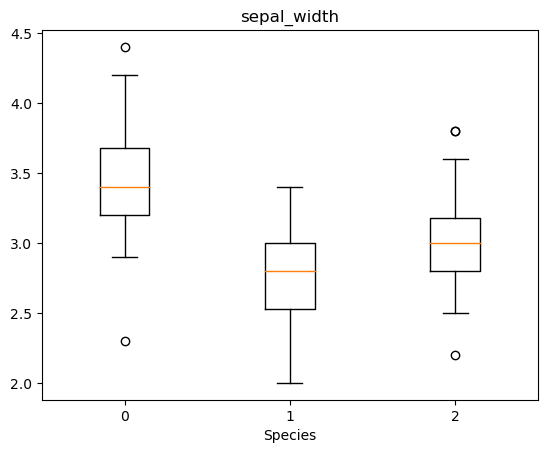

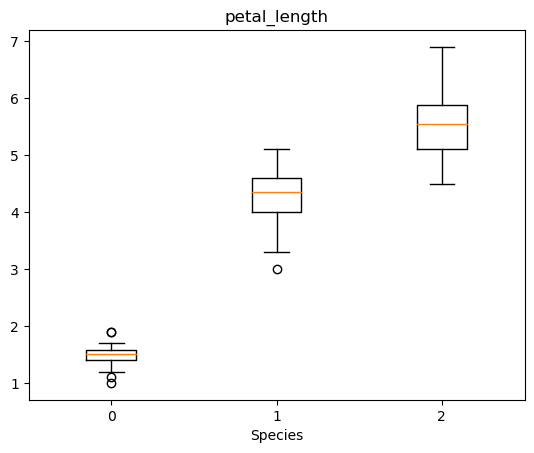

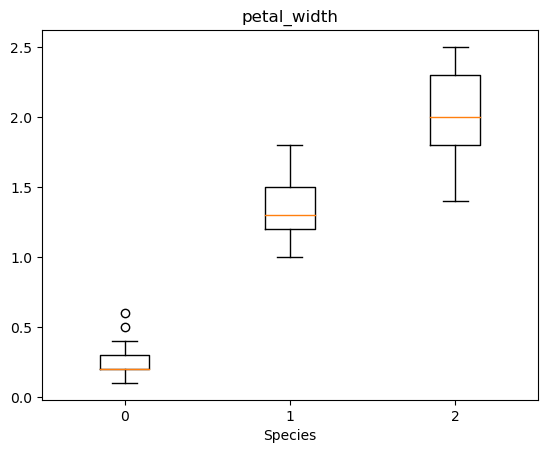

In [47]:
for feature in features:
    labels = [g[0] for g in df.groupby("Species")]
    group_df = [g[1][feature] for g in df.groupby("Species")]
    plt.boxplot(group_df, labels=labels)
    plt.title(feature)
    plt.xlabel("Species")
    plt.show()

### ラベルごとのデータの分布（バイオリン図）

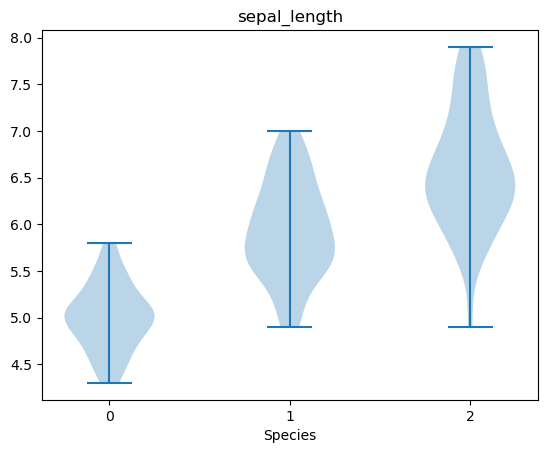

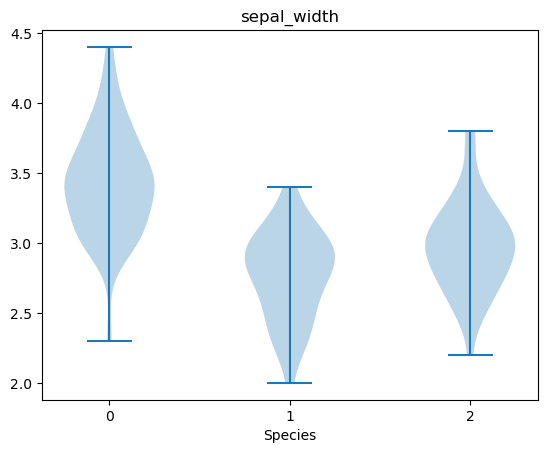

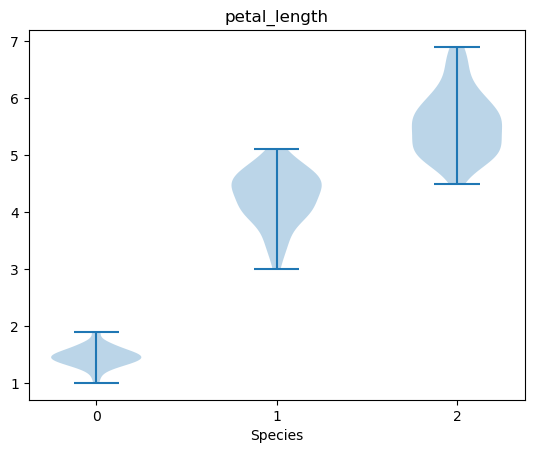

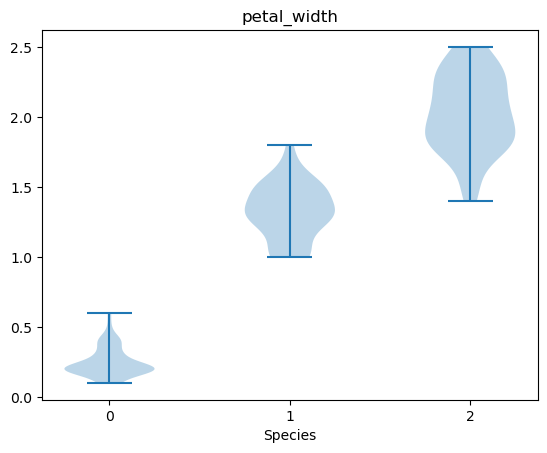

In [59]:
for feature in features:
    labels = [g[0] for g in df.groupby("Species")]
    group_df = [g[1][feature] for g in df.groupby("Species")]
    plt.violinplot(group_df)
    plt.title(feature)
    plt.xlabel("Species")
    plt.xticks([1,2,3], labels)
    plt.show()

## 【問題7】特徴量間の関係の確認

### ４つの特徴量から２つ選ぶような組み合わせの散布図

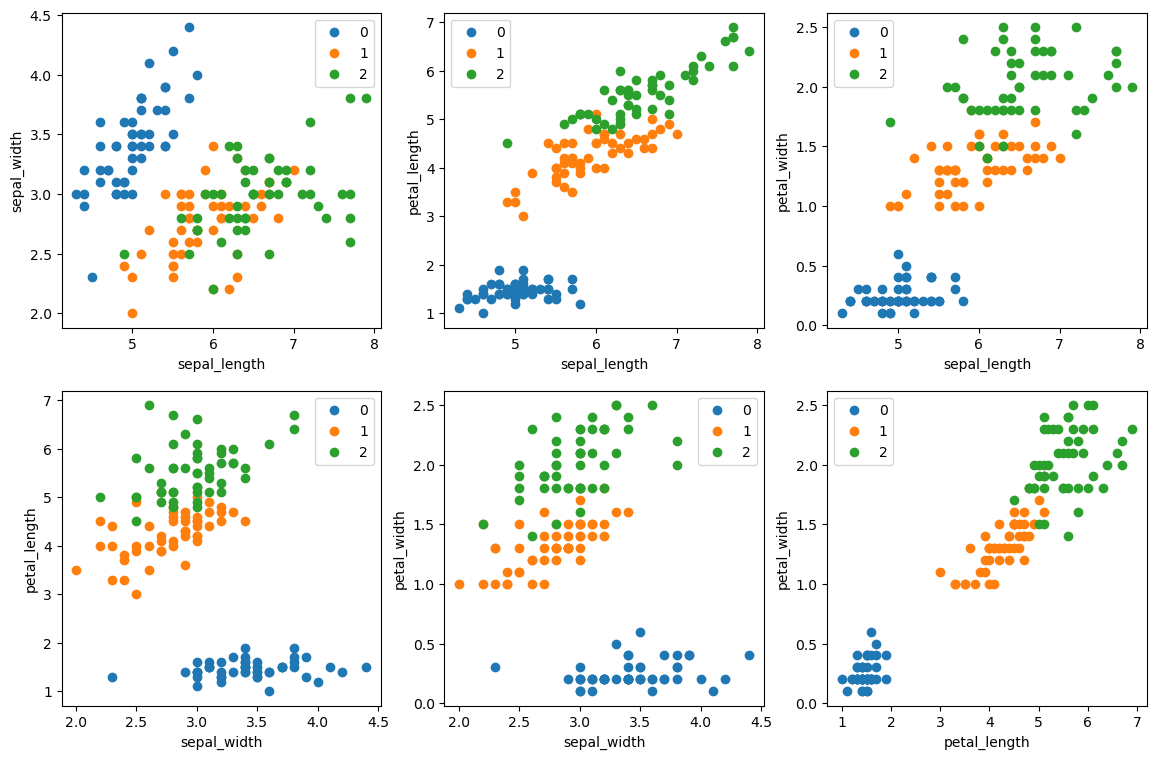

In [93]:
fig, axes = plt.subplots(2, 3, figsize=(14, 9))
combs = iter(list(itertools.combinations(features, 2)))
for axs in axes:
    for ax in axs:
        f1, f2 = next(combs)
        for group in df.groupby("Species"):
            label, group_df = group
            ax.scatter(group_df[f1], group_df[f2], label=label)
        ax.set_xlabel(f1)
        ax.set_ylabel(f2)
        ax.legend()
plt.show()

### 特徴量の組み合わせを一度に表示する散布図

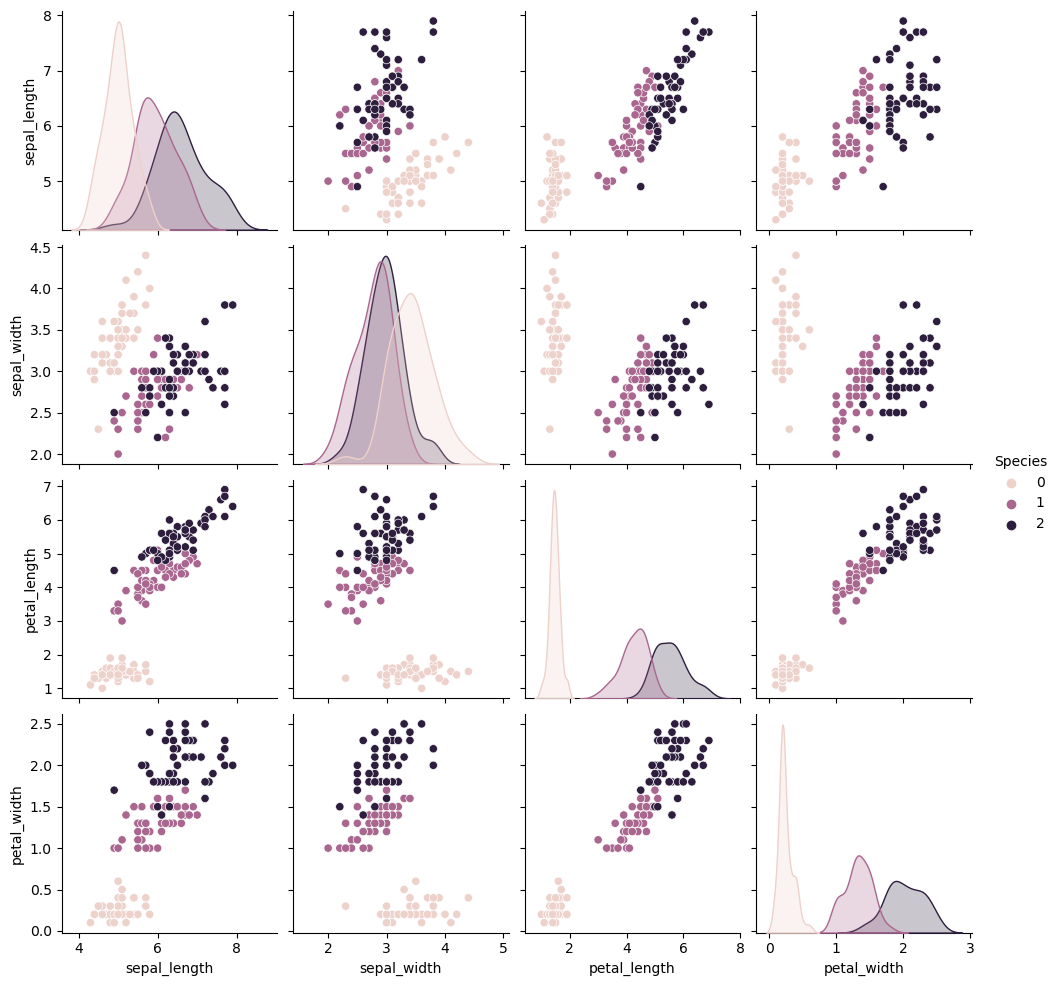

In [61]:
sns.pairplot(df, hue="Species")
plt.show()

### 特徴量の相関係数行列

In [63]:
corr = df.iloc[:, 0:4].corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


### 相関係数行列のヒートマップ

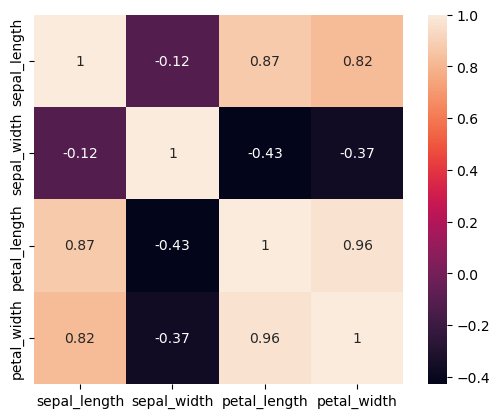

In [67]:
sns.heatmap(corr, square=True, annot=True)
plt.show()

## 【問題8】可視化したグラフや表の結果の説明

aaa